In [60]:
%run /home/analysis_user/New_trap_code/Tools/basic_packages.py


In [61]:
plt.rcParams["figure.figsize"] = (16,12)
plt.rcParams["font.size"] = 24
plt.rcParams['xtick.labelsize'] = "small"
plt.rcParams['ytick.labelsize'] = 36

In [154]:
data_list =[]
for i in range(100):
    fname = "/data/new_trap/20201007/Bead1/Shaking/Shaking345/ShakingNoSphere0_%d.h5" %i
    BDF = BeadDataFile.BeadDataFile(fname)
    fsamp=5000
    res = 5000
    data=BDF.xyz
    data_det=signal.detrend(data)
    trigger_value = next(x[0] for x in enumerate(BDF.trigger) if x[1] > 0)
    y_1000=1*data_det[1]
    z_1000=100*data_det[2]
    xpsd, freqs = matplotlib.mlab.psd(data_det[0][trigger_value:], Fs = fsamp, NFFT = res)
    ypsd, freqs = matplotlib.mlab.psd(y_1000[trigger_value:], Fs = fsamp, NFFT = res)
    zpsd, freqs = matplotlib.mlab.psd(z_1000[trigger_value:], Fs = fsamp, NFFT = res)
    if(np.sum(zpsd)<50000000000):  
        print(fname)
        data_list.append(data_det)
    """
    _,ax = plt.subplots()
    ax.loglog(freqs, xpsd, '.-', label="x",markersize=1,linewidth=0.5)
    ax.loglog(freqs, ypsd, '.-', label="y*1",markersize=1,linewidth=0.5)
    ax.loglog(freqs, zpsd, '.-', label="%f" %np.sum(zpsd) ,markersize=1,linewidth=0.5,)
    ax.legend()
    ax.set_xlabel('Frequency [Hz]')
    ax.set_ylabel('PSD [a.u.]')
    #plt.xlim(1,2500)
    #plt.ylim(1e6,1e10)
    plt.grid(True)
    print(np.sum(zpsd))
    """
    

/data/new_trap/20201007/Bead1/Shaking/Shaking345/ShakingNoSphere0_0.h5
/data/new_trap/20201007/Bead1/Shaking/Shaking345/ShakingNoSphere0_3.h5
/data/new_trap/20201007/Bead1/Shaking/Shaking345/ShakingNoSphere0_4.h5
/data/new_trap/20201007/Bead1/Shaking/Shaking345/ShakingNoSphere0_5.h5
/data/new_trap/20201007/Bead1/Shaking/Shaking345/ShakingNoSphere0_6.h5
/data/new_trap/20201007/Bead1/Shaking/Shaking345/ShakingNoSphere0_7.h5
/data/new_trap/20201007/Bead1/Shaking/Shaking345/ShakingNoSphere0_8.h5
/data/new_trap/20201007/Bead1/Shaking/Shaking345/ShakingNoSphere0_9.h5
/data/new_trap/20201007/Bead1/Shaking/Shaking345/ShakingNoSphere0_11.h5
/data/new_trap/20201007/Bead1/Shaking/Shaking345/ShakingNoSphere0_12.h5
/data/new_trap/20201007/Bead1/Shaking/Shaking345/ShakingNoSphere0_13.h5
/data/new_trap/20201007/Bead1/Shaking/Shaking345/ShakingNoSphere0_14.h5
/data/new_trap/20201007/Bead1/Shaking/Shaking345/ShakingNoSphere0_17.h5
/data/new_trap/20201007/Bead1/Shaking/Shaking345/ShakingNoSphere0_19.h5


In [158]:
data_mean = np.mean(data_list,axis=0)
fsamp = 5000
res = 50000
freqs=np.linspace(0,int(fsamp/2),(int(res/2))+1)    # change


In [159]:
xpsd_filt,ypsd_filt,zpsd_filt,xphase_filt,xphase_filt,zphase_filt = data_to_amp_and_phase(data_mean,fsamp,res)
    


3901568892504.754


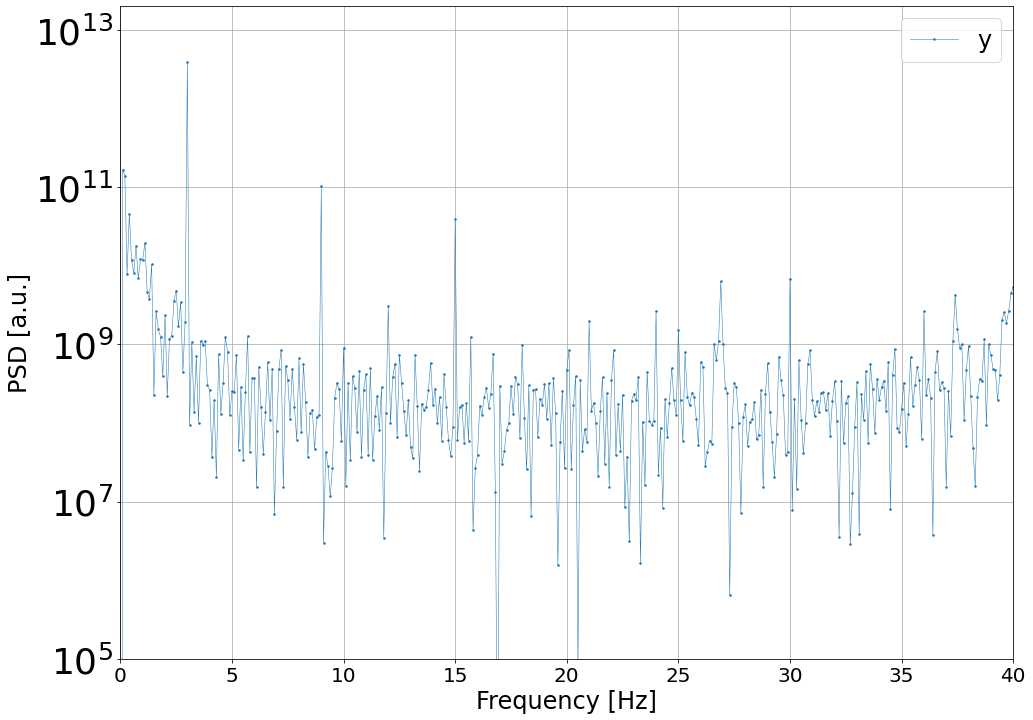

In [160]:
_,ax = plt.subplots()
#ax.semilogy(freqs, xpsd, '.-', label="x",markersize=1,linewidth=0.5)
ax.semilogy(freqs, 1e2*ypsd_filt, '.-', label="y",markersize=3,linewidth=0.5)
#ax.semilogy(freqs, 1e4*zpsd, '.-', label="z",markersize=1,linewidth=0.5,)
ax.legend()
ax.set_xlabel('Frequency [Hz]')
ax.set_ylabel('PSD [a.u.]')
plt.grid(True)
print(np.sum(zpsd))
plt.xlim(0,40)
plt.ylim(1e5,2e13)
plt.show()

3901568892504.754


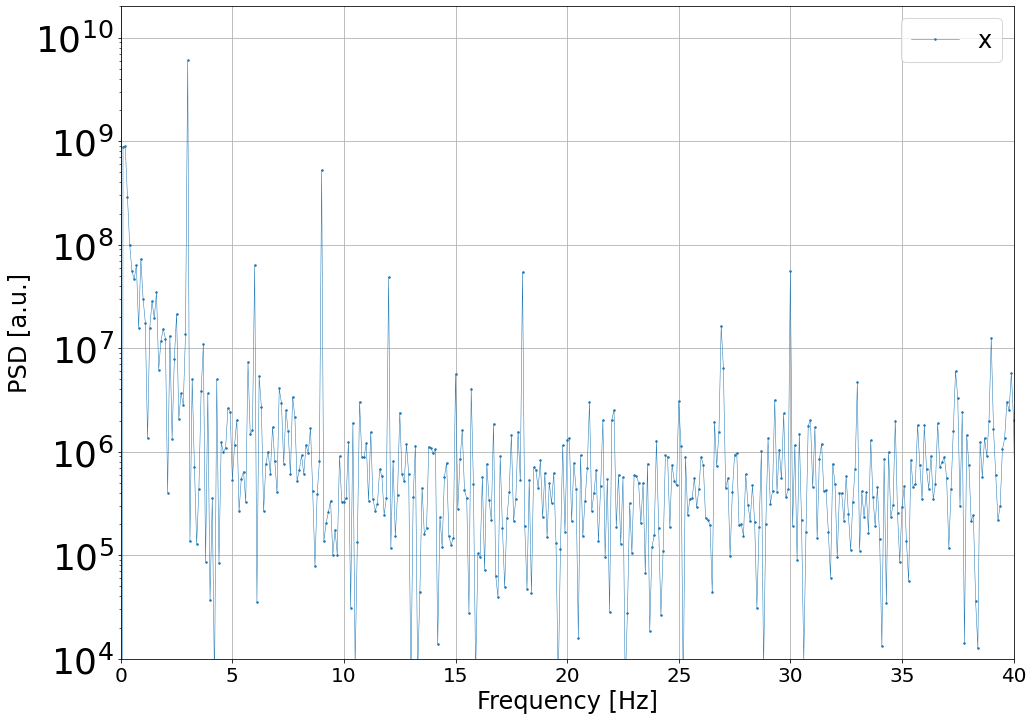

In [162]:
_,ax = plt.subplots()
ax.semilogy(freqs, xpsd_filt, '.-', label="x",markersize=3,linewidth=0.5)

#ax.semilogy(freqs, 1e2*ypsd, '.-', label="y",markersize=3,linewidth=0.5)
#ax.semilogy(freqs, 1e4*zpsd, '.-', label="z",markersize=1,linewidth=0.5,)
ax.legend()
ax.set_xlabel('Frequency [Hz]')
ax.set_ylabel('PSD [a.u.]')
plt.grid(True)
print(np.sum(zpsd))
plt.xlim(0,40)
plt.ylim(1e4,2e10)
plt.show()

3901568892504.754


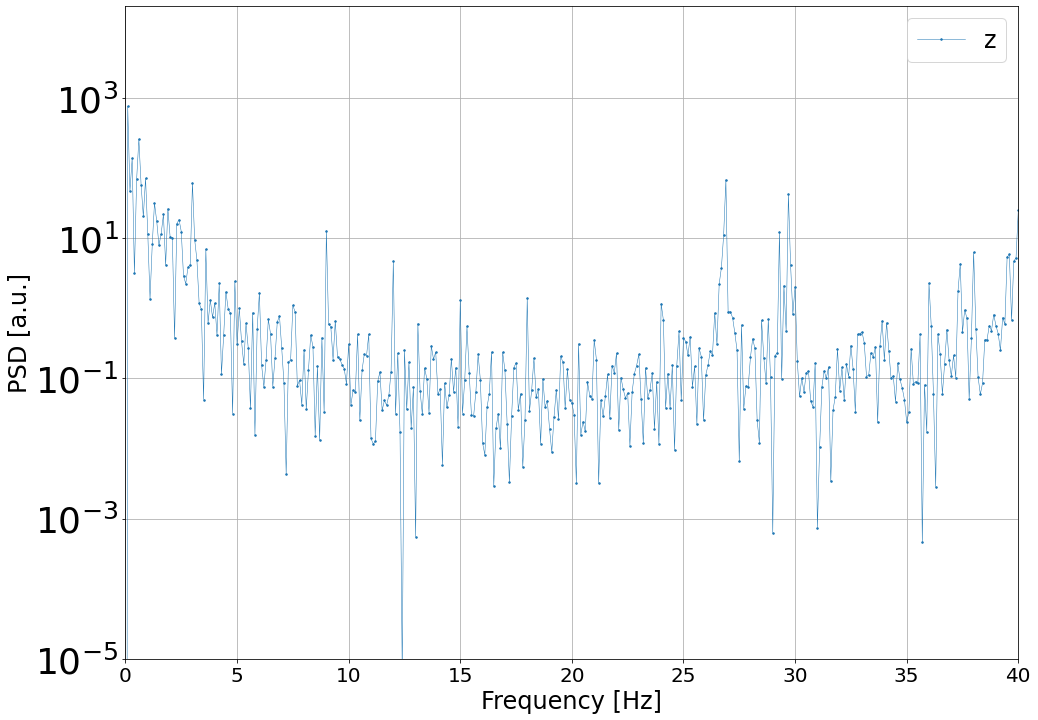

In [164]:
_,ax = plt.subplots()
#ax.semilogy(freqs, xpsd, '.-', label="x",markersize=1,linewidth=0.5)
#ax.semilogy(freqs, 1e2*ypsd, '.-', label="y",markersize=3,linewidth=0.5)
ax.semilogy(freqs, zpsd_filt, '.-', label="z",markersize=3,linewidth=0.5,)

ax.legend()
ax.set_xlabel('Frequency [Hz]')
ax.set_ylabel('PSD [a.u.]')
plt.grid(True)
print(np.sum(zpsd))
plt.xlim(0,40)
plt.ylim(1e-5,2e4)
plt.show()